In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Battery_RUL.csv')
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [ ]:
df.dtypes

Cycle_Index                  float64
Discharge Time (s)           float64
Decrement 3.6-3.4V (s)       float64
Max. Voltage Dischar. (V)    float64
Min. Voltage Charg. (V)      float64
Time at 4.15V (s)            float64
Time constant current (s)    float64
Charging time (s)            float64
RUL                            int64
dtype: object

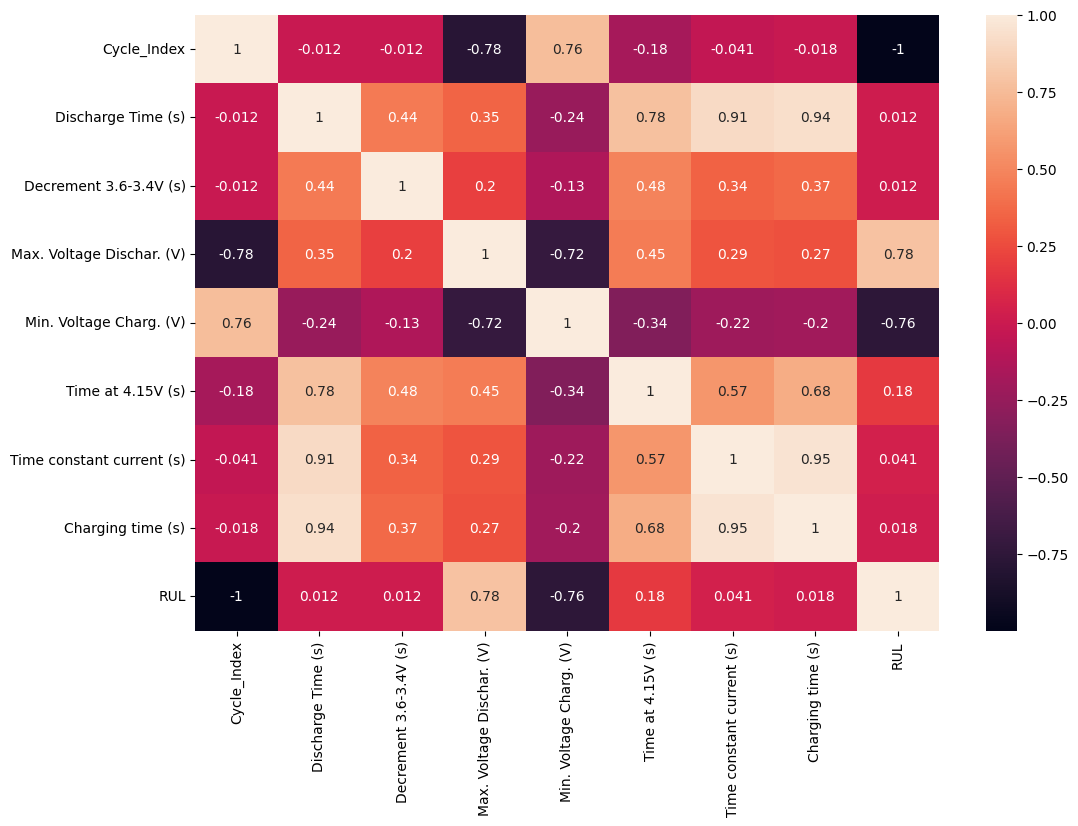

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
df.drop(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Time constant current (s)', 'Charging time (s)'], axis=1, inplace=True)

In [ ]:
X = df.drop(['RUL'], axis=1)
y = df['RUL']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [ ]:
def fit_transform(scaler, X, y):
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y
def transform(scaler, X, y):
    X_scaled = scaler.transform(X)
    return X_scaled, y

In [ ]:
import time
model_names = ["Linear Regression", "SVM", "Decision Tree", "XGBoost", "AdaBoost", "Bagging Regressor", "LightGBM"]
rmse_test = []
acc_train = []
acc_test = []
training_time = []

# Linear Regression Model

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled, y_train = fit_transform(scaler, X_train, y_train)
X_test_scaled, y_test = transform(scaler, X_test, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
start_time = time.time()
model = LinearRegression()
end_time = time.time()
model.fit(X_train_scaled, y_train)
acc = model.score(X_test_scaled, y_test)
print(acc)
training_time.append(end_time-start_time)
acc_test.append(acc)

0.7167993299340891


In [ ]:
acc2 = model.score(X_train_scaled, y_train)
print(acc2)
acc_train.append(acc2)

0.7421819944258525


In [ ]:
y_pred = model.predict(X_test_scaled)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(mse)
rmse_test.append(mse)

171.57508180930037


# SVM

In [ ]:
from sklearn.svm import SVR
model = SVR()
start_time = time.time()
model.fit(X_train_scaled, y_train)
end_time = time.time()
acc = model.score(X_test_scaled, y_test)
print(acc)
training_time.append(end_time-start_time)
acc_test.append(acc)

0.9176910619088745


In [ ]:
acc2 = model.score(X_train_scaled, y_train)
print(acc2)
acc_train.append(acc2)

0.922722282061464


In [ ]:
y_pred = model.predict(X_test_scaled)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test.append(mse)

# Decision Tree

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
start_time=time.time()
model = DecisionTreeRegressor()
end_time=time.time()
model.fit(X_train_scaled, y_train)
acc=model.score(X_test_scaled, y_test)
print(acc)
training_time.append(end_time-start_time)
acc_test.append(acc)

0.9836137126843141


In [ ]:
acc2=model.score(X_train_scaled, y_train)
print(acc2)
acc_train.append(acc2)

0.9999856634984762


In [ ]:
y_pred = model.predict(X_test_scaled)
mse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test.append(mse)

# XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()
start_time=time.time()
model.fit(X_train_scaled, y_train)
end_time=time.time()
acc=model.score(X_test_scaled, y_test)
print(acc)
training_time.append(end_time-start_time)
acc_test.append(acc)

0.9877696374402801


In [ ]:
acc2=model.score(X_train_scaled, y_train)
print(acc2)
acc_train.append(acc2)

0.995701446233934


In [ ]:
y_pred = model.predict(X_test_scaled)
mse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test.append(mse)

# AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
start_time=time.time()
model.fit(X_train_scaled, y_train)
end_time=time.time()
acc=model.score(X_test_scaled, y_test)
print(acc)
training_time.append(end_time-start_time)
acc_test.append(acc)

0.9494298883585444


In [ ]:
acc2=model.score(X_train_scaled, y_train)
print(acc2)
acc_train.append(acc2)

0.9521868479944942


In [ ]:
y_pred = model.predict(X_test)
mse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test.append(mse)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(


# Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor()
start_time=time.time()
model.fit(X_train_scaled, y_train)
end_time=time.time()
acc=model.score(X_test_scaled, y_test)
print(acc)
training_time.append(end_time-start_time)
acc_test.append(acc)

0.9883416199127214


In [ ]:
acc2=model.score(X_train_scaled, y_train)
print(acc2)
acc_train.append(acc2)

0.9982325333310854


In [ ]:
y_pred = model.predict(X_test)
mse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test.append(mse)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(


# LightGBM

In [ ]:
import lightgbm as lgb
model = lgb.LGBMRegressor()
start_time=time.time()
model.fit(X_train_scaled, y_train)
end_time=time.time()
acc=model.score(X_test_scaled, y_test)
print(acc)
training_time.append(end_time-start_time)
acc_test.append(acc)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 10092, number of used features: 3
[LightGBM] [Info] Start training from score 556.635157
0.9833701083508222


In [ ]:
acc2=model.score(X_train_scaled, y_train)
print(acc2)
acc_train.append(acc2)

0.988100103626795


In [ ]:
y_pred = model.predict(X_test)
mse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test.append(mse)

In [ ]:
data = {'Algorithm':model_names, 'Time':training_time, 'MSE':rmse_test, 'Train Acc':acc_train, 'Test Acc':acc_test}
result = pd.DataFrame(data)

In [ ]:
result.sort_values(by='Train Acc', ascending=False)

,Algorithm,Time,MSE,Train Acc,Test Acc
2,Decision Tree,0.000097,41.271225,0.999986,0.983614
5,Bagging Regressor,0.217552,475.287466,0.998233,0.988342
3,XGBoost,0.106099,35.655517,0.995701,0.987770
6,LightGBM,0.087851,424.124868,0.988100,0.983370
4,AdaBoost,0.355774,511.927531,0.952187,0.949430
1,SVM,5.824670,92.497624,0.922722,0.917691
0,Linear Regression,0.000050,171.575082,0.742182,0.716799
